<a href="https://colab.research.google.com/github/Sadiksha08/FDS-Lab-Work/blob/main/FDS_LAB_Practical_2_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descriptive Statistics**

* Descriptive Statistics - A descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.
* Why is Descriptive Statistics important? - Descriptive statistics are very important because if we simply presented our raw data it would be hard to visualize what the data was showing, especially if there was a lot of it. Descriptive statistics therefore enables us to present the data in a more meaningful way, which allows simpler interpretation of the data. For example, if we had the results of 100 pieces of students' coursework, we may be interested in the overall performance of those students. We would also be interested in the distribution or spread of the marks. Descriptive statistics allow us to do this.
* Role of Descriptive Statistics in Machine learning - Descriptive Statistical Analysis helps you to understand your data and is a very important part of Machine Learning. This is due to Machine Learning being all about making predictions. On the other hand, statistics is all about drawing conclusions from data, which is a necessary initial step.





---

---

---


#Dataset Example - 1


---




In [ ]:
# importing required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pd.set_option("display.max_columns",None)  # to display all the columns
pd.options.display.float_format = "{:,.2f}".format # to display float value upto two decimals

Format : A data frame with 53940 rows and 10 variables

Description : A dataset containing the prices and other attributes of almost 54,000 diamonds.

The variables are as follows:

*   price:  price in US dollars (\$326--\$18,823)
*   carat: weight of the diamond (0.2--5.01)
*   cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   colour: diamond colour, from J (worst) to D (best)
*   clarity: a measurement of how clear the diamond is (IF (best), VVS1, VVS2,VS1, VS2, SI1, SI2, I1 (worst) )
*   popularity: popularity of this specs (Good, Fair, Poor)
*   x: length in mm (0--10.74)
*   y: width in mm (0--58.9)
*   z: depth in mm (0--31.8)
*   depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
*   table: width of top of diamond relative to widest point (43--95)














In [ ]:
# reading data from csv file 
xls = pd.read_csv('/content/gdrive/MyDrive/FDS_PRAC/datasets/FDSJOURNAL_DATASETS/_diamond.csv')

In [ ]:
xls.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


Measures of Central Tendency
* Mean - The sum of a collection of numbers divided by the count of numbers in the collection.
* Median - The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution.
* Mode - The mode is the value that appears most often in a set of data values.

In [ ]:
des_df = xls.drop(['id'],axis = 1) # drop id column
for col in des_df:   # drop all alpha-numeric columns
  if des_df[col].dtype == 'object':
    des_df = des_df.drop([col], axis = 1)

des_r = des_df.describe() # describe() gives us mean,min,max,median,1Q,3Q,std
des_r = des_r.rename(index={'50%':'median/50%'}) 

Measures of Dispersion
* Standard Deviation - The standard deviation is a measure of the amount of variation or dispersion of a set of values.
* Variance - The term variance refers to a statistical measurement of the spread between numbers in a data set.
* Min and Max Variables
  * Min is the minimum value in the column or in dataset.
  * Max is the maximum value in the column or in dataset.

Quartiles -  A quartile is a type of quantile which divides the number of data points into four parts, or quarters, of more-or-less equal size.
* 25% or 1st quartile - The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.
* 50% or 2nd quartile - The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
* 75% or 3rd quartile - The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point.

In [ ]:
var_r = des_df.var() # calulating variance seperately

varlist = []
for col in des_df.columns: # converting result of var() from series to list
  if des_df[col].dtype == 'object':
    continue
  varlist.append(round(des_df[col],5))

df = pd.DataFrame([varlist],columns=des_r.columns, index=['var']) # putting results of variance into dataframe
mct = des_r.append(df) # adding var to describe result

In [ ]:
mode_r = des_df.mode() # calculating mode seperately
mode_r = mode_r.rename(index={0:'mode'}) # renaming index
mct_m = mct.append(mode_r) # adding mode to describe result

Skewness and Kurtosis
* Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
* Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

In [ ]:
skew_r = skew(des_df) # skewness resultant list
df = pd.DataFrame([skew_r],columns=des_df.columns, index=['skewness']) # converting list to dataframe
mct_s = mct_m.append(df) # adding skewness to describe dataframe

kur_r = kurtosis(des_df) # kurtosis resultant list
df = pd.DataFrame([kur_r],columns=des_df.columns, index=['kurtosis']) # converting list to dataframe
mct_k = mct_s.append(df) # adding kurtosis to describe dataframe

Range - It is difference between largest and smallest value.

In [ ]:
r_list = []
for col in des_df.columns.to_list(): # calculating range for all columns
  r_list.append(des_df[col].max()-des_df[col].min())

df = pd.DataFrame([r_list],columns=des_df.columns, index=['range']) # converting range list to dataframe
mct_r = mct_k.append(df) # adding range to describe dataframe

In [ ]:
print(mct_r) # print final dataframe

                                                        carat  \
count                                               53,940.00   
mean                                                     0.80   
std                                                      0.47   
min                                                      0.20   
25%                                                      0.40   
median/50%                                               0.70   
75%                                                      1.04   
max                                                      5.01   
var         0       0.23
1       0.21
2       0.23
3      ...   
mode                                                     0.30   
skewness                                                 1.12   
kurtosis                                                 1.26   
range                                                    4.81   

                                                        depth  \
count                   

Box Plots - A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.
* Lowest observation
* Highest observation
* Lower Quartile
* Upper Quartile
* Median

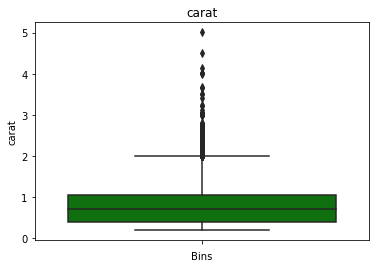

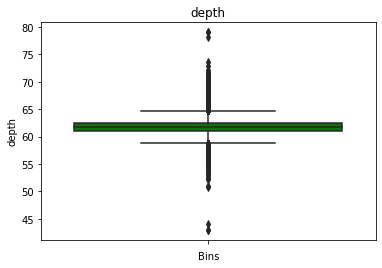

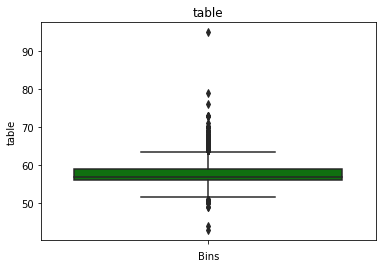

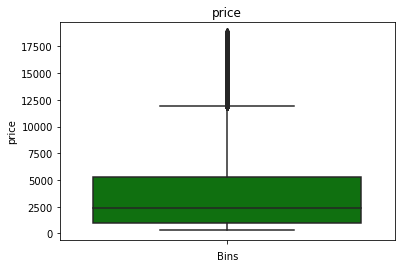

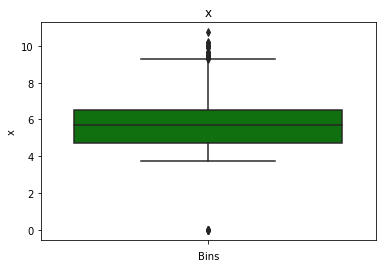

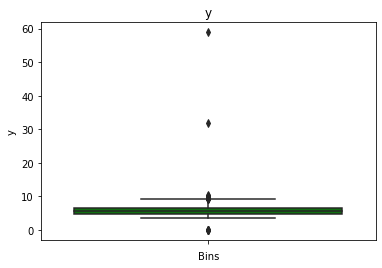

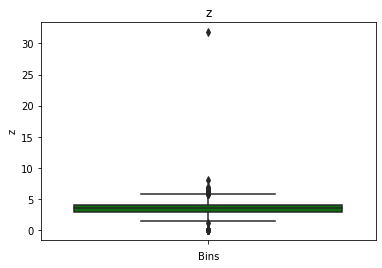

In [ ]:
# plotting boxplots
colNames = xls.columns.tolist() # make a list of columns present in dataframes
for colName in colNames:
    if xls[colName].dtype == "object" or colName == 'id': # skip Id and string columns
        continue
    plt.figure()
    sns.boxplot(y=xls[colName], color='g') # plot the boxplot
    plt.title(colName) # provide title
    plt.ylabel(colName) # name Y axis
    plt.xlabel('Bins') # name X axis
    plt.show()



---

---

---











#Dataset Example - 2


---





**Importing Libraries**

    * Pandas for reading data file
    * Numpy for performing statistical calculations
    * Matplotlib and seaborn for visualization
    * Scipy.stats for Skewness and Kurtosis





In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew
from scipy.stats import kurtosis

***To see all the columns which are present in the dataset***

In [ ]:
pd.set_option("display.max_columns",None)#To see all the columns which are present in the dataset

***#Mounting Google Drive***

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


***Unzip the dataset.zip.***

In [ ]:
!unzip /content/gdrive/MyDrive/dataset.zip


Archive:  /content/gdrive/MyDrive/dataset.zip
replace dataset.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset.xlsx            



**Reading dataset**

    df is dataframe .
    pd.read_excel reads the excel file.
    head Function prints the first five rows of the dataset. *italicized text*

**Description of data**

    Data belongs to student category which contains fname , age and gender column.
    Fname contins the name of students, age column contains the age of the students and grade column contains the marks obtained. *italicized text*



In [ ]:
df=pd.read_excel('/content/gdrive/MyDrive/FDS_PRAC/datasets/FDSJOURNAL_DATASETS/gradedata.xlsx')
df.head()

,Unnamed: 0,fname,lname,gender,age,exercise,hours,grade,address
0,0,Marcia,Pugh,female,17,3,10,82.40,"9253 Richardson Road, Matawan, NJ 07747"
1,1,Kadeem,Morrison,male,18,4,4,78.20,"33 Spring Dr., Taunton, MA 02780"
2,2,Nash,Powell,male,18,5,9,79.30,"41 Hill Avenue, Mentor, OH 44060"
3,3,Noelani,Wagner,female,14,2,7,83.20,"8839 Marshall St., Miami, FL 33125"
4,4,Noelani,Cherry,female,18,4,15,87.40,"8304 Charles Rd., Lewis Center, OH 43035"



**Measures of Central Tendency**

    Mean
        The sum of a collection of numbers divided by the count of numbers in the collection.
  
    Median
        The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution.
   
    Mode
        The mode is the value that appears most often in a set of data values.


**Where the measures of central tendency used?**

    The above three values are used in handling null and outlier values in Machine learning, in Image processing mean and median plays an important role , we use mean and median for applying threshold values on the particular image.
    cv2.ADAPTIVE_THRESH_MEAN_C threshold value is the mean of neighbourhood area.

    cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value.



In [ ]:
df_mean=df.mean()
print("*Mean of columns age and grade*")
print(df_mean)
df_median=df.median()
print("*Median of columns age and grade*")
print(df_median)
df_mode=df.mode()
print("*Mode of columns age and grade*")
print(df_mode)

*Mean of columns age and grade*
Unnamed: 0   999.50
age           16.58
exercise       3.00
hours         10.99
grade         82.56
dtype: float64
*Median of columns age and grade*
Unnamed: 0   999.50
age           17.00
exercise       3.00
hours         11.00
grade         82.70
dtype: float64
*Mode of columns age and grade*
      Unnamed: 0  fname    lname  gender   age  exercise  hours  grade  \
0              0  Dolan   Conley  female 17.00      4.00  11.00 100.00   
1              1    NaN   Harvey    male   NaN       NaN    NaN    NaN   
2              2    NaN  Oconnor     NaN   NaN       NaN    NaN    NaN   
3              3    NaN  Randall     NaN   NaN       NaN    NaN    NaN   
4              4    NaN      NaN     NaN   NaN       NaN    NaN    NaN   
...          ...    ...      ...     ...   ...       ...    ...    ...   
1995        1995    NaN      NaN     NaN   NaN       NaN    NaN    NaN   
1996        1996    NaN      NaN     NaN   NaN       NaN    NaN    NaN   
1997  

<ipython-input-30-952bfb550b35>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean=df.mean()
<ipython-input-30-952bfb550b35>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_median=df.median()



**Measures of Variability**

    Standard Deviation
       The standard deviation is a measure of the amount of variation or dispersion of a set of values.
    
    Variance
        The term variance refers to a statistical measurement of the spread between numbers in a data set.
   
    Min and Max Variables
        Min is the minimum value in the column or in dataset.
        Max is the maximum value in the column or in dataset.

**Where the measures of variability is used?**

    Standard deviation is used to know how data is spread so we can find some good insigths from it.
    Example:-

        If we are working with data which consist column of years, tax rate, sales amount etc. so, after applying standard deviation we will get to know at which year the tax rate or sales amount was more or less.
        
    Min and Max both are used to find range of the array or particilar column, so we can detect the outliers.



In [ ]:
print("Standard deviation of columns age and grade")
print(df.std())
print("Variance of columns age and grade  ")
print(df.var())
print("The Minimum value are" )
print(df.min())
print("The Maximum value are" )
print(df.max())

Standard deviation of columns age and grade
age     1.70
grade   9.75
dtype: float64
Variance of columns age and grade  
age      2.88
grade   95.02
dtype: float64
The Minimum value are
fname    Aaron
age         14
grade    32.00
dtype: object
The Maximum value are
fname    Zorita
age          19
grade    100.00
dtype: object


<ipython-input-97-851b2ba1dc55>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())
<ipython-input-97-851b2ba1dc55>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var())




    Skewness and Kurtosis

        Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
        Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

**Where do we use Skewness and Kurtosis ?**

    Skewness can be used to obtain approximate probabilities and quantiles of distributions (such as value at risk in finance) via the Cornish-Fisher expansion.
    
    Kurtosis is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution . High kurtosis in a data set is an indicator that data has heavy tails or outliers.



In [ ]:
age_skew=skew(df["age"])
grade_skew=skew(df["grade"])
print("The skewness of column age is : ",age_skew)
print("The skewness of column grade is : ",grade_skew)

The skewness of column age is :  -0.0752765542984972
The skewness of column grade is :  -0.21238878400270958


In [ ]:


age_kurtosis=kurtosis(df["age"])
print("The kurtosis of column age is ",age_kurtosis)
grade_kurtosis=kurtosis(df["grade"])
print("The kurtosis of column grade is ",grade_kurtosis)



The kurtosis of column age is  -1.2366835884614293
The kurtosis of column grade is  -0.19902555827060553



 * Range
        The Range is the difference between the lowest and highest values.

    Given that the range can easily be computed with information on the maximum and minimum value of the data set.

    Users requiring only a rough indication of the data may prefer to use this indicator over more sophisticated measures of spread.



In [ ]:
age_range=(df["age"].max())-(df["age"].min())
print("The range of column age is :",age_range)

The range of column age is : 5


In [ ]:
grade_range=(df["grade"].max())-(df["grade"].min())
print("The range of column grade is :",grade_range)

The range of column grade is : 68.0




 * Percentiles/Quartiles
        A percentile is a measure at which that percentage of the total values are the same as or below that measure. For example, 90% of the data values lie below the 90th percentile, whereas 10% of the data values lie below the 10th percentile.

        Quartiles are values that divide a (part of a) data table into four groups containing an approximately equal number of observations. The total of 100% is split into four equal parts: 25%, 50%, 75% and 100%.

    Percentiles are used to understand and interpret data.
    Quartiles are used to summarize a group of numbers.



In [ ]:
print("50th percentile of age column is:",np.percentile(df["age"],50))
print("25th percentile of age column is:",np.percentile(df["age"],25))
print("75th percentile of age column is:",np.percentile(df["age"],75))

50th percentile of age column is: 17.0
25th percentile of age column is: 15.0
75th percentile of age column is: 18.0


In [ ]:


print("50th percentile of grade column is:",np.percentile(df["grade"],50))
print("25th percentile of grade column is:",np.percentile(df["grade"],25))
print("75th percentile of grade column is:",np.percentile(df["grade"],75))



50th percentile of grade column is: 82.7
25th percentile of grade column is: 75.57499999999999
75th percentile of grade column is: 89.7


In [ ]:
print("Q2th quantile of age column is : ",np.quantile(df["age"],.50))
print("Q1th quantile of age column is : ",np.quantile(df["age"],.25))
print("Q3th quantile of age column is : ",np.quantile(df["age"],.75))

Q2th quantile of age column is :  17.0
Q1th quantile of age column is :  15.0
Q3th quantile of age column is :  18.0


In [ ]:
print("Q2 quantile of grade column is : ",np.quantile(df["grade"],.50))
print("Q1th quantile of grade column is : ",np.quantile(df["grade"],.25))
print("Q3 quantile of grade column is : ",np.quantile(df["grade"],.75))

Q2 quantile of grade column is :  82.7
Q1th quantile of grade column is :  75.57499999999999
Q3 quantile of grade column is :  89.7




  * Box Plots
        A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.
        Lowest observation
        Highest observation
        Lower Quartile
        Upper Quartile
        Median



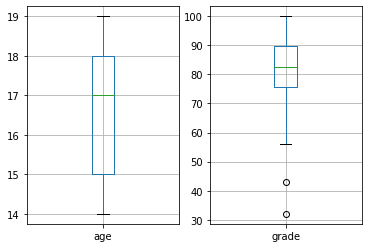

In [ ]:
plt.figure()
plt.subplot(1,2,1)
df.boxplot(column="age")
plt.subplot(1,2,2)
df.boxplot(column="grade")
plt.show()



---

---

---







#Dataset Example - 3


---




### Importing Libraries
 - Pandas for reading data file
 - Numpy for performing statistical calculations 
 - Matplotlib and seaborn for visualization 
 - Scipy.stats for Skewness and Kurtosis

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew
from scipy.stats import kurtosis

- To see all the columns which are present in the dataset

In [ ]:
pd.set_option("display.max_columns",None)#To see all the columns which are present in the dataset

### Reading dataset
- df is dataframe .
- pd.read_excel reads the excel file.
- head Function prints the first five rows of the dataset.

### Description of data
- Data belongs to student category which contains **fname** , **age** and **gender** column.
- **Fname** contins the name of students, **age** column contains the age of the students and **grade** column contains the marks obtained. 

In [ ]:
#used Gradedata.csv instead of data1.csv
df=pd.read_csv("/content/gdrive/MyDrive/FDS_PRAC/datasets/FDSJOURNAL_DATASETS/gradedata.csv")
df.head()
df=df.drop(['lname','gender','exercise','hours','address'],axis = 1)
df.head()

,fname,age,grade
0,Marcia,17,82.40
1,Kadeem,18,78.20
2,Nash,18,79.30
3,Noelani,14,83.20
4,Noelani,18,87.40


### Measures of Central Tendency
- **Mean**
    - The sum of a collection of numbers divided by the count of numbers in the collection.
- **Median** 
    - The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution. 
- **Mode**
    - The mode is the value that appears most often in a set of data values.

#### Where the measures of central tendency used?
- The above three values are used in handling null and outlier values in **Machine learning**, in **Image processing** mean and median plays an important role , we use mean and median for applying threshold values on the particular image.
- cv2.ADAPTIVE_THRESH_MEAN_C threshold value is the mean of neighbourhood area.
- cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. 


#### Example of median blur 

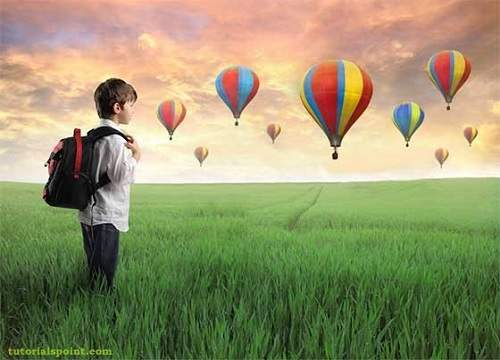
<br></br>
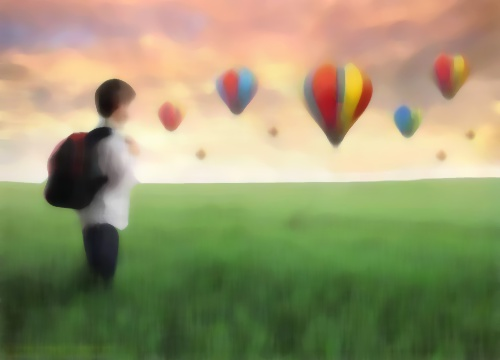

In [ ]:
df_mean=df.mean()
print("*Mean of columns age and grade*")
print(df_mean)
df_median=df.median()
print("*Median of columns age and grade*")
print(df_median)
df_mode=df.mode()
print("*Mode of columns age and grade*")
print(df_mode)

*Mean of columns age and grade*
age     16.58
grade   82.56
dtype: float64
*Median of columns age and grade*
age     17.00
grade   82.70
dtype: float64
*Mode of columns age and grade*
   fname  age  grade
0  Dolan   17 100.00


<ipython-input-86-952bfb550b35>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean=df.mean()
<ipython-input-86-952bfb550b35>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_median=df.median()


#### Measures of Variability 
- **Standard Deviation**
    - The standard deviation is a measure of the amount of variation or dispersion of a set of values.
- **Variance**
    - The term variance refers to a statistical measurement of the spread between numbers in a data set.
- **Min and Max Variables**
    - Min is the minimum value in the column or in dataset.
    - Max is the maximum value in the column or in dataset.


#### Where the measures of variability is used?
- **Standard deviation** is used to know how data is spread so we can find some good insigths from it.
- Example:- 
    - If we are working with data which consist column of years, tax rate, sales amount etc. so, after applying standard deviation we will get to know at which year the tax rate or sales amount was more or less.
- **Min and Max** both are used to find range of the array or particilar column, so we can detect the outliers.

In [ ]:
print("Standard deviation of columns age and grade")
print(df.std())
print("Variance of columns age and grade  ")
print(df.var())
print("The Minimum value are" )
print(df.min())
print("The Maximum value are" )
print(df.max())

Standard deviation of columns age and grade
age     1.70
grade   9.75
dtype: float64
Variance of columns age and grade  
age      2.88
grade   95.02
dtype: float64
The Minimum value are
fname    Aaron
age         14
grade    32.00
dtype: object
The Maximum value are
fname    Zorita
age          19
grade    100.00
dtype: object


<ipython-input-87-851b2ba1dc55>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())
<ipython-input-87-851b2ba1dc55>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var())


- **Skewness and Kurtosis**
    - **Skewness** is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
    - **Kurtosis** is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

#### Where do we use Skewness and Kurtosis ?
- **Skewness** can be used to obtain approximate probabilities and quantiles of distributions (such as value at risk in finance) via the Cornish-Fisher expansion.
- **Kurtosis** is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution . High kurtosis in a data set is an indicator that data has heavy tails or outliers.

In [ ]:
age_skew=skew(df["age"])
grade_skew=skew(df["grade"])
print("The skewness of column age is : ",age_skew)
print("The skewness of column grade is : ",grade_skew)

The skewness of column age is :  -0.0752765542984972
The skewness of column grade is :  -0.21238878400270958


In [ ]:
age_kurtosis=kurtosis(df["age"])
print("The kurtosis of column age is ",age_kurtosis)
grade_kurtosis=kurtosis(df["grade"])
print("The kurtosis of column grade is ",grade_kurtosis)

The kurtosis of column age is  -1.2366835884614293
The kurtosis of column grade is  -0.19902555827060553


- **Range**
    - The Range is the difference between the lowest and highest values. 
- Given that the range can easily be computed with information on the maximum and minimum value of the data set.
- Users requiring only a rough indication of the data may prefer to use this indicator over more sophisticated measures of spread. 

In [ ]:
age_range=(df["age"].max())-(df["age"].min())
print("The range of column age is :",age_range)

The range of column age is : 5


In [ ]:
grade_range=(df["grade"].max())-(df["grade"].min())
print("The range of column grade is :",grade_range)

The range of column grade is : 68.0


- **Percentiles/Quartiles**
    - A **percentile** is a measure at which that percentage of the total values are the same as or below that measure. For example, 90% of the data values lie below the 90th percentile, whereas 10% of the data values lie below the 10th percentile.
    - **Quartiles** are values that divide a (part of a) data table into four groups containing an approximately equal number of observations. The total of 100% is split into four equal parts: 25%, 50%, 75% and 100%.

- Percentiles are used to understand and interpret data. 
- Quartiles are used to summarize a group of numbers. 

In [ ]:
print("50th percentile of age column is:",np.percentile(df["age"],50))
print("25th percentile of age column is:",np.percentile(df["age"],25))
print("75th percentile of age column is:",np.percentile(df["age"],75))

50th percentile of age column is: 17.0
25th percentile of age column is: 15.0
75th percentile of age column is: 18.0


In [ ]:
print("50th percentile of grade column is:",np.percentile(df["grade"],50))
print("25th percentile of grade column is:",np.percentile(df["grade"],25))
print("75th percentile of grade column is:",np.percentile(df["grade"],75))

50th percentile of grade column is: 82.7
25th percentile of grade column is: 75.57499999999999
75th percentile of grade column is: 89.7


In [ ]:
print("Q2th quantile of age column is : ",np.quantile(df["age"],.50))
print("Q1th quantile of age column is : ",np.quantile(df["age"],.25))
print("Q3th quantile of age column is : ",np.quantile(df["age"],.75))

Q2th quantile of age column is :  17.0
Q1th quantile of age column is :  15.0
Q3th quantile of age column is :  18.0


In [ ]:
print("Q2 quantile of grade column is : ",np.quantile(df["grade"],.50))
print("Q1th quantile of grade column is : ",np.quantile(df["grade"],.25))
print("Q3 quantile of grade column is : ",np.quantile(df["grade"],.75))

Q2 quantile of grade column is :  82.7
Q1th quantile of grade column is :  75.57499999999999
Q3 quantile of grade column is :  89.7


- **Box Plots**
    - A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary. 
    - Lowest observation
    - Highest observation
    - Lower Quartile
    - Upper Quartile 
    - Median 

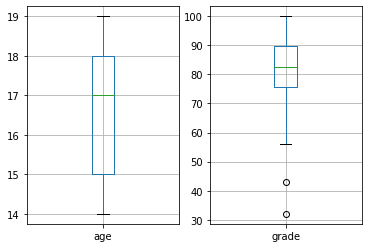

In [ ]:
plt.figure()
plt.subplot(1,2,1)
df.boxplot(column="age")
plt.subplot(1,2,2)
df.boxplot(column="grade")
plt.show()



---

---

---







#Dataset Example - 4


---




**Importing packages**

Importing packages that are needed in python to perform  statistical operations 
<br>
<br>
* numpy- 
It is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
<br>

* pandas-
pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
<br>

*   seaborn- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
<br>

*   Scipy.stats- It is a module contains a large number of probability distributions as well as a growing library of statistical functions.









In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_columns",None)



---







**Importing Dataset**

Mounting Google Drive locally and reading LaptopDS.csv to a dataframe then displaying its basic info using df.info()
<br>
<br>
LaptopDS.csv -

It is a dataset which contains 205 entries of latpops based on their model name and specification.This dataset has combined information of diffrent laptops so that it can be used in analysis by or can be used by customers to identify which laptops meets their requirements.

It contains 8 columns as brand(brand of the laptop), laptop_name(Model name of the laptop),display_size(Screen display size), processor_type(processor model name), graphics_card(graphic card model name), disk_space(size of disk and its type), discount_price(discounted price), price(orignal price) and ratings_5max(rating from 0 to 5).    


In [ ]:
%cd
from google.colab import drive
drive.mount('/content/gdrive')

/root
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/FDS_PRAC/datasets/FDSJOURNAL_DATASETS/laptops.csv')
print("Dataset On Laptop specedication based on brands : - \n",df)

Dataset On Laptop specedication based on brands : - 
       brand                          laptop_name   Category  display_ size  \
0     Apple                          MacBook Pro  Ultrabook          13.30   
1     Apple                          Macbook Air  Ultrabook          13.30   
2        HP                               250 G6   Notebook          15.60   
3     Apple                          MacBook Pro  Ultrabook          15.40   
4     Apple                          MacBook Pro  Ultrabook          13.30   
..      ...                                  ...        ...            ...   
199      HP                          Probook 470   Notebook          17.30   
200    Dell                        Inspiron 7577     Gaming          15.60   
201  Lenovo  V110-15ISK (i5-6200U/4GB/128GB/W10)   Notebook          15.60   
202    Acer                       Aspire E5-576G   Notebook          15.60   
203  Lenovo                    Legion Y720-15IKB     Gaming          15.60   

         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     204 non-null    object 
 1   laptop_name               204 non-null    object 
 2   Category                  204 non-null    object 
 3   display_ size             204 non-null    float64
 4   Screen                    204 non-null    object 
 5   Processor                 204 non-null    object 
 6   RAM                       204 non-null    object 
 7    disk_space               204 non-null    object 
 8   graphics_card             204 non-null    object 
 9   Operating System          204 non-null    object 
 10  Operating System Version  165 non-null    object 
 11  Weight                    204 non-null    object 
 12  Price                     204 non-null    float64
 13  discount_price            15 non-null     float64
 14  rating    



---







 **Measures of Central Tendency**



central tendency is a central or typical value for a probability distribution. It may also be called a center or location of the distribution.
<br>
<br>


Use of central tendency statistical model- 


*   A statistical model is a mathematical model that embodies a set of statistical assumptions concerning the generation of sample data (and similar data from a larger population).
*   The central tendency is dependent on the analysis of concentration of the values of observations in an distribution.
*   In statistical sense, this statement is said to be the concentration of n items in Xi variable.
*   The study of central  are essential dimensions in understanding the distributional characteristics of a series/variable. 
*   For example, the two sets of daily rainfall for the months of April and May 2004 in Cherrapunji have same magnitude of average rainfall (a most familiar measure of central tendency) called mean while the ranges of distribution (a difference of maximum and minimum value of data –series) are different as it vary from 0 to 492.2 mm in the month of April and from 0 to 327.6mm in the month of May. 
*   It shows different degree of dispersion despite the same value of their mean. So the nature of these two distributions is different from each other showing differences in distributions.


The 3 most common measures of central tendency are the mean, median and mode.










---



**Mean**





*   It is sum of all values divided by number of values( average )
*   df.mean() Returns the mean of the values over the requested axis.
*   Using it on the data set LaptopDS.csv returned mean of all the column of numeric type in the dataset.
*   The data that are returned are showing the display_size, price and the discount price that the most of the laptops have. 







In [ ]:
print('Mean of numeric columns-\n',df.mean())

Mean of numeric columns-
 display_ size       15.18
Price              968.03
discount_price   1,087.55
rating               3.27
dtype: float64


<ipython-input-35-e1a24dd2030e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Mean of numeric columns-\n',df.mean())




---



**Trimmed Mean**



*   It is similar to mean except here we exclude the smallest and largest values in our data set.
*   Calculated by the average of all values after dropping a fixed number of extreme values. 
*   The use of a trimmed mean helps eliminate the influence of outliers or data points on the tails that may unfairly affect the traditional mean. 
*   Here we are calculating the 10 % trimmed mean of the columns display_size, price and discount.




In [ ]:
print('Trimmed Mean of the column display_ size = ',stats.trim_mean(df['display_ size'],0.1))
print('Trimmed Mean of the column Price = ',stats.trim_mean(df['Price'],0.1))
print('Trimmed Mean of the column discount_price = ',stats.trim_mean(df['discount_price'],0.1))

Trimmed Mean of the column display_ size =  15.195121951219509
Trimmed Mean of the column Price =  877.8018292682926
Trimmed Mean of the column discount_price =  nan




---



**Weighted Mean**

* It is similar to mean except weights are used to balance the observation
* calculated by the sum of all values times a weight divided by the sum of the weights.
*   It is used when we consider some data values to be more important than other values and so we want them to contribute more to the final "average". 
* np.average() is used to Compute the weighted average along the specified axis.
*    Here we are calculating the Weightedmean where weights are shifted by 10 of the columns display_size, price and discount.




weights=[i for i in range(10,215)]
print('Weighted Mean of the column display_ size = ',np.average(df['display_ size'],weights=weights))
print('Weighted Mean of the column Price = ',np.average(df['Price'],weights=weights))
print('Weighted Mean of the column discount_price = ',np.average(df['discount_price'],weights=weights))

In [ ]:
weights=[i for i in range(10,215)]
print('Weighted Mean of the column display_ size = ',np.average(df['display_ size'],weights=weights))
print('Weighted Mean of the column Price = ',np.average(df['Price'],weights=weights))
print('Weighted Mean of the column discount_price = ',np.average(df['discount_price'],weights=weights))

TypeError: ignored



---



**Median**


*   It is the value such that one-half of the data lies above and below. 
*   df.median() Return the median of the values over the requested axis.
*   Using it on the data set LaptopDS.csv returned median of all the column of numeric type in the dataset 
*   The data that are returned are showing  middle values of column the display_size, price and the discount price. 



In [ ]:
print('Median of numeric columns-\n',df.median())

Median of numeric columns-
 display_ size       15.60
Price              857.50
discount_price   1,154.78
rating               3.00
dtype: float64


<ipython-input-43-829c78bff1c3>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Median of numeric columns-\n',df.median())




---



**Mode**

*   It is the value that frequenty occurs.
*   df.mode() Returns The mode of a set of values is the value that appears most often. It can have multiple values.


In [ ]:
for i in df.columns:
  print("\nMode of column "+i+" -\n",df[i].mode())


Mode of column brand -
 0    HP
dtype: object

Mode of column laptop_name -
 0           250 G6
1    Inspiron 3567
2      MacBook Pro
dtype: object

Mode of column Category -
 0    Notebook
dtype: object

Mode of column display_ size -
 0   15.60
dtype: float64

Mode of column Screen -
 0    Full HD 1920x1080
dtype: object

Mode of column Processor -
 0    Intel Core i5 8250U 1.6GHz
dtype: object

Mode of column RAM -
 0    8GB
dtype: object

Mode of column  disk_space -
 0    256GB SSD
dtype: object

Mode of column graphics_card -
 0    Intel HD Graphics 620
dtype: object

Mode of column Operating System -
 0    Windows
dtype: object

Mode of column Operating System Version -
 0    10
dtype: object

Mode of column Weight -
 0    2.2kg
dtype: object

Mode of column Price -
 0   699.00
dtype: float64

Mode of column discount_price -
 0      300.59
1      322.99
2      350.50
3      499.45
4      500.70
5      700.00
6      700.43
7    1,154.78
8    1,200.32
9    1,236.54
10   1,300.00



---


**Measures of Variability**

*  A measure of variability is a summary statistic that represents the amount of dispersion in a dataset i.e How spread out are the values.
* Analysts frequently use the mean to summarize the center of a population or a process. 
* When a distribution has lower variability, the values in a dataset are more consistent. 
*However, when the variability is higher, the data points are more dissimilar and extreme values become more likely. 
* Consequently, understanding variability helps us grasp the likelihood of unusual events.
* following are the most common Measure of variablity 




---



**Standard Deviation**

*   A standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance.
*   Standard deviation is an especially useful tool in investing and trading strategies as it helps measure market and security volatility and predict performance trends. 
* As it relates to investing, for example, an index fund is likely to have a low standard deviation versus its benchmark index, as the fund's goal is to replicate the index.
* df.std() Return sample standard deviation over requested axis.


In [ ]:
print('standard deviation of numeric columns - \n',df.std())

standard deviation of numeric columns - 
 display_ size      1.38
Price            650.13
discount_price   678.61
rating             1.23
dtype: float64


<ipython-input-45-022062466f0a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('standard deviation of numeric columns - \n',df.std())




---



**Variance**

*  The term variance refers to a statistical measurement of the spread between numbers in a data set. 
*  More specifically, variance measures how far each number in the set is from the mean and thus from every other number in the set.
*  Statisticians use variance to see how individual numbers relate to each other within a data set, rather than using broader mathematical techniques such as arranging numbers into quartiles. 
* The advantage of variance is that it treats all deviations from the mean the same regardless of their direction. 
* The squared deviations cannot sum to zero and give the appearance of no variability at all in the data. 
* One drawback to variance, though, is that it gives added weight to outliers. These are the numbers that are far from the mean.  
* df.var() Return unbiased variance over requested axis.

In [ ]:
print('variance of numeric columns - \n',df.var())

variance of numeric columns - 
 display_ size          1.89
Price            422,662.92
discount_price   460,506.63
rating                 1.52
dtype: float64


<ipython-input-46-dcb29a85855c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('variance of numeric columns - \n',df.var())




---



**Min and Max Variables**


* df.min() Returns the minimum of the values over the requested axis.
* df.max() Returns the maximum of the values over the requested axis.
* Using it in LaptopDS.csv returns minimum and maximum values of all columns.

In [ ]:
print('\nMin variables of all columns -\n',df.min())
print('\nMax variables of all columns -\n ',df.max())


Min variables of all columns -
 brand                                            Acer
laptop_name         15-BS078nr (i7-7500U/8GB/1TB/W10)
Category                           2 in 1 Convertible
display_ size                                   10.10
Screen                                       1366x768
Processor                   AMD A6-Series 9220 2.5GHz
RAM                                              12GB
 disk_space                       128GB Flash Storage
graphics_card                          AMD R17M-M1-70
Operating System                              Android
Weight                                         0.69kg
Price                                          191.90
discount_price                                 300.59
rating                                           1.00
dtype: object

Max variables of all columns -
  brand                                             Xiaomi
laptop_name                              Zenbook UX430UA
Category                                       Ul

<ipython-input-47-e2307c3ea25d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('\nMin variables of all columns -\n',df.min())
<ipython-input-47-e2307c3ea25d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('\nMax variables of all columns -\n ',df.max())




---



**Skewness**

* In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
* The skewness value can be positive, zero, negative, or undefined.
* For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. 
* df.skew() return unbiased skew over requested axis.

In [ ]:
print('Skewness of numeric columns - \n',df.skew())

Skewness of numeric columns - 
 display_ size    -0.38
Price             3.07
discount_price    0.50
rating           -0.08
dtype: float64


<ipython-input-48-b61385c14c53>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Skewness of numeric columns - \n',df.skew())




---



**Kurtosis**

* In probability theory and statistics, kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.
* Like skewness, kurtosis describes the shape of a probability distribution and there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population.
* df.kurtosis() Returns unbiased kurtosis over requested axis.
* df.kurtosis() computes the Fisher's Kurtosis which is obtained by subtracting the Pearson's Kurtosis by three. With Fisher's Kurtosis, definition a normal distribution has a kurtosis of 0.

In [ ]:
print('kurtosis of numeric columns - \n',df.kurtosis())

kurtosis of numeric columns - 
 display_ size     0.17
Price            18.81
discount_price   -1.00
rating           -1.05
dtype: float64


<ipython-input-49-5ae793df48cd>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('kurtosis of numeric columns - \n',df.kurtosis())




---



**Range**

*    Range is the difference between the lowest and highest values.
*   It is calculated by max-min value of a column.
* It is a good way to get a very basic understanding of how spread out numbers in the data set really are because it is easy to calculate as it only requires a basic arithmetic operation, but there are also a few other applications of the range of a data set in statistics.



In [ ]:
print('Range of the column display_ size = ',df['display_ size'].max()-df['display_ size'].min())
print('Range of the column Price = ',df['Price'].max()-df['Price'].min())
print('Range of the column discount_price = ',df['discount_price'].max()-df['discount_price'].min())

Range of the column display_ size =  8.299999999999999
Range of the column Price =  5907.1
Range of the column discount_price =  2044.95




---



**Percentile**

* percentile is a term used in statistics to express how a score compares to other scores in the same set. 
* While there is technically no standard definition of percentile, it's typically communicated as the percentage of values that fall below a particular value in a set of data scores.
* In statistics, a percentile is a score below which a given percentage of scores in its frequency distribution fall or a score at or below which a given percentage fall.
*  For example, the 50th percentile (the median) is the score below which 50% (exclusive) or at or below which (inclusive) 50% of the scores in the distribution may be found.
* np.percentile() Returns the q-th percentile(s) of the array elements.

In [ ]:
print("\nPercentile summary-")
print('\n\n10th Percentile of the column display_ size = ',np.percentile(df['display_ size'],10))
print('50th Percentile(medain) of the display_ size = ',np.percentile(df['display_ size'],50))
print('90th Percentile of the column display_ ize = ',np.percentile(df['display_ size'],90))
print('\n\n10th Percentile of the column price = ',np.percentile(df['Price'],10))
print('50th Percentile(medain) of the column price = ',np.percentile(df['Price'],50))
print('90th Percentile of the column price = ',np.percentile(df['Price'],90))
print('\n\n10th Percentile of the column discount_price = ',np.percentile(df['discount_price'],10))
print('50th Percentile(medain) of the column discount_price = ',np.percentile(df['discount_price'],50))
print('90th Percentile of the column discount_price = ',np.percentile(df['discount_price'],90))


Percentile summary-


10th Percentile of the column display_ size =  13.3
50th Percentile(medain) of the display_ size =  15.6
90th Percentile of the column display_ ize =  17.3


10th Percentile of the column price =  385.5
50th Percentile(medain) of the column price =  857.5
90th Percentile of the column price =  1643.0000000000005


10th Percentile of the column discount_price =  nan
50th Percentile(medain) of the column discount_price =  nan
90th Percentile of the column discount_price =  nan




---



**Quertiles**

*   In statistics, a quartile is a type of quantile which divides the number of data points into four parts, or quarters, of more-or-less equal size. 
* The data must be ordered from smallest to largest to compute quartiles
*  The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.
* The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
* The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point.
* df.quantile() Returns values at the given quantile over requested axis.



In [ ]:
print("\nQuertile summary-")
print("\n25% quertile (Lower quertile) of numeric columns-\n ",df.quantile(q=0.25))
print("\n50% quertile (Middle quertile)of numeric columns-\n",df.quantile(q=0.5))
print("\n75% quertile (Upper quertile) of numeric columns-\n",df.quantile(q=0.75))


Quertile summary-

25% quertile (Lower quertile) of numeric columns-
  display_ size     14.00
Price            514.00
discount_price   500.07
rating             2.00
Name: 0.25, dtype: float64

50% quertile (Middle quertile)of numeric columns-
 display_ size       15.60
Price              857.50
discount_price   1,154.78
rating               3.00
Name: 0.5, dtype: float64

75% quertile (Upper quertile) of numeric columns-
 display_ size       15.60
Price            1,211.50
discount_price   1,500.25
rating               4.00
Name: 0.75, dtype: float64




---



**Boxplot**



* A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
* Diffrent parts of boxplot are-
*   median (Q2/50th Percentile): the middle value of the dataset.
* first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
* third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
* interquartile range (IQR): 25th to the 75th percentile.
* “maximum”: Q3 + 1.5*IQR
* “minimum”: Q1 -1.5*IQR
* whiskers ( the two lines outside the box that extend to the highest and lowest observations.)
* outliers (shown as black diamond)
*  sns.boxplot() Draws a box plot to show distributions with respect to categories.
* The below boxplot shows us that there are some outliers in discount_price and price columns





Boxplot for all numeric columns-




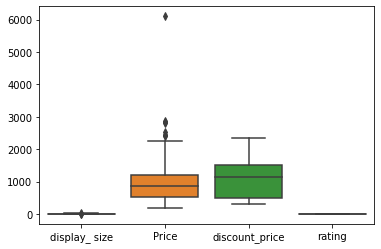

In [ ]:
print("Boxplot for all numeric columns-\n\n")
sns.boxplot(data=df)

Boxplot for column display_size-




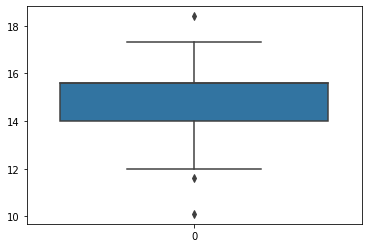

In [ ]:
print("Boxplot for column display_size-\n\n")
sns.boxplot(data=df['display_ size'])



---

---

---







#Dataset Example - 5


---




**Importing packages**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis
pd.set_option("display.max_columns",None)

**Importing Dataset**

In [ ]:
%cd
from google.colab import drive
drive.mount('/content/gdrive')

/root
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ex1 = "/content/gdrive/MyDrive/FDS_PRAC/datasets/FDSJOURNAL_DATASETS/Iris.xlsx"
df=pd.read_excel(ex1)
df=df.drop(['Id'], axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
...,...,...,...,...
145,6.70,3.00,5.20,2.30
146,6.30,2.50,5.00,1.90
147,6.50,3.00,5.20,2.00
148,6.20,3.40,5.40,2.30


 **Measures of Central Tendency**



**Mean**




In [ ]:
print('Mean of numeric columns-\n',df.mean())

Mean of numeric columns-
 SepalLengthCm   5.84
SepalWidthCm    3.05
PetalLengthCm   3.76
PetalWidthCm    1.20
dtype: float64


**Trimmed Mean**

In [ ]:
print('Trimmed Mean of the column SepalLength = ',stats.trim_mean(df['SepalLengthCm'],0.1))
print('Trimmed Mean of the column SepalWidth = ',stats.trim_mean(df['SepalWidthCm'],0.1))
print('Trimmed Mean of the column PetalLength = ',stats.trim_mean(df['PetalLengthCm'],0.1))
print('Trimmed Mean of the column PetalWidth = ',stats.trim_mean(df['PetalWidthCm'],0.1))

Trimmed Mean of the column SepalLength =  5.8083333333333345
Trimmed Mean of the column SepalWidth =  3.0391666666666666
Trimmed Mean of the column PetalLength =  3.7608333333333333
Trimmed Mean of the column PetalWidth =  1.1841666666666668


**Weighted Mean**

In [ ]:
weights=[i for i in range(10,140)]
print('Weighted Mean of the column SepalLength = ',np.average(df['SepalLengthCm'],weights=weights))
print('Weighted Mean of the column SepalWidth = ',np.average(df['SepalWidthCm'],weights=weights))
print('Weighted Mean of the column PetalLength = ',np.average(df['PetalLengthCm'],weights=weights))
print('Weighted Mean of the column PetalWidth = ',np.average(df['PetalWidthCm'],weights=weights))

TypeError: ignored

**Median**

In [ ]:
print('Median of numeric columns-\n',df.median())

Median of numeric columns-
 SepalLengthCm   5.80
SepalWidthCm    3.00
PetalLengthCm   4.35
PetalWidthCm    1.30
dtype: float64


**Mode**

In [ ]:
for i in df.columns:
  print("\nMode of column "+i+" -\n",df[i].mode())


Mode of column SepalLengthCm -
 0   5.00
dtype: float64

Mode of column SepalWidthCm -
 0   3.00
dtype: float64

Mode of column PetalLengthCm -
 0   1.50
dtype: float64

Mode of column PetalWidthCm -
 0   0.20
dtype: float64


**Measures of Variability**

**Standard Deviation**

In [ ]:
print("Standard deviation of columns SepalLength, SepalWidth, PetalLength and PetalWidth ")
print(df.std())

Standard deviation of columns SepalLength, SepalWidth, PetalLength and PetalWidth 
SepalLengthCm   0.83
SepalWidthCm    0.43
PetalLengthCm   1.76
PetalWidthCm    0.76
dtype: float64


**Variance**

In [ ]:
print("Variance of columns SepalLength, SepalWidth, PetalLength and PetalWidth  ")
print(df.var())

Variance of columns SepalLength, SepalWidth, PetalLength and PetalWidth  
SepalLengthCm   0.69
SepalWidthCm    0.19
PetalLengthCm   3.11
PetalWidthCm    0.58
dtype: float64


**Min and Max Variables**


In [ ]:
print("The Minimum value are" )
print(df.min())
print("The Maximum value are" )
print(df.max())

The Minimum value are
SepalLengthCm   4.30
SepalWidthCm    2.00
PetalLengthCm   1.00
PetalWidthCm    0.10
dtype: float64
The Maximum value are
SepalLengthCm   7.90
SepalWidthCm    4.40
PetalLengthCm   6.90
PetalWidthCm    2.50
dtype: float64


**Skewness**

In [ ]:
SepalLength_skew=skew(df["SepalLengthCm"])
SepalWidth_skew=skew(df["SepalWidthCm"])
PetalLength_skew=skew(df["PetalLengthCm"])
PetalWidth_skew=skew(df["PetalWidthCm"])
print("The skewness of column SepalLength is : ",SepalLength_skew)
print("The skewness of column SepalWidth is : ",SepalWidth_skew)
print("The skewness of column PetalLength is : ",PetalLength_skew)
print("The skewness of column PetalWidth is : ",PetalWidth_skew)

The skewness of column SepalLength is :  0.3117530585022963
The skewness of column SepalWidth is :  0.330702812773315
The skewness of column PetalLength is :  -0.2717119501716388
The skewness of column PetalWidth is :  -0.10394366626751729


**Kurtosis**

In [ ]:
SepalLength_kurtosis=kurtosis(df["SepalLengthCm"])
SepalWidth_kurtosis=kurtosis(df["SepalWidthCm"])
PetalLength_kurtosis=kurtosis(df["PetalLengthCm"])
PetalWidth_kurtosis=kurtosis(df["PetalWidthCm"])
print("The kurtosis of column SepalLength is : ",SepalLength_kurtosis)
print("The kurtosis of column SepalWidth is : ",SepalWidth_kurtosis)
print("The kurtosis of column PetalLength is : ",PetalLength_kurtosis)
print("The kurtosis of column PetalWidth is : ",PetalWidth_kurtosis)

The kurtosis of column SepalLength is :  -0.5735679489249765
The kurtosis of column SepalWidth is :  0.24144329938318343
The kurtosis of column PetalLength is :  -1.3953593021397128
The kurtosis of column PetalWidth is :  -1.3352456441311857


**Range**

In [ ]:
SepalLength_range=(df["SepalLengthCm"].max())-(df["SepalLengthCm"].min())
print("The range of column SepalLength is :",SepalLength_range)

The range of column SepalLength is : 3.6000000000000005


In [ ]:
SepalWidth_range=(df["SepalWidthCm"].max())-(df["SepalWidthCm"].min())
print("The range of column SepalWidth is :",SepalWidth_range)

The range of column SepalWidth is : 2.4000000000000004


In [ ]:
PetalLength_range=(df["PetalLengthCm"].max())-(df["PetalLengthCm"].min())
print("The range of column PetalLength is :",PetalLength_range)

The range of column PetalLength is : 5.9


In [ ]:
PetalWidth_range=(df["PetalWidthCm"].max())-(df["PetalWidthCm"].min())
print("The range of column PetalWidth is :",PetalWidth_range)

The range of column PetalWidth is : 2.4


**Quertiles and Percentiles**

In [ ]:
des_r = df.describe()
des_r

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


**Boxplot**

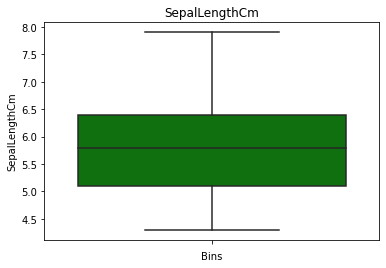

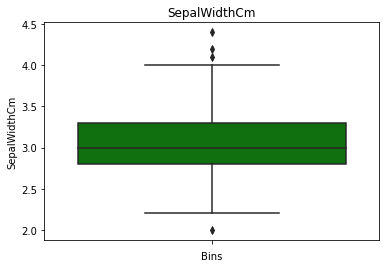

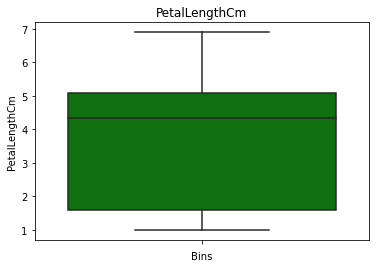

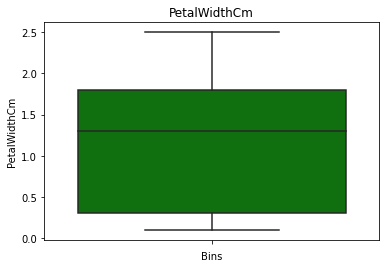

In [ ]:
# plotting boxplots
colNames = df.columns.tolist() # make a list of columns present in dataframes
for colName in colNames:
    if df[colName].dtype == "object" or colName == 'id': # skip Id and string columns
        continue
    plt.figure()
    sns.boxplot(y=df[colName], color='g') # plot the boxplot
    plt.title(colName) # provide title
    plt.ylabel(colName) # name Y axis
    plt.xlabel('Bins') # name X axis
    plt.show()